# 서울 날씨 트위터를 위한 머신러닝

![서울타워](https://raw.githubusercontent.com/leehaesung/AWS_BIG_DATA_SPECIALTY/master/data/QRCode.png.png)

* Data set: daily-minimum-temperatures.csv (호주 멜번시티 날씨 데이터 1981-1991)

* Date: 23rd Apr 2019

* Coded By Haesung Lee

* AWS-IoT Diagram:

![Image](https://raw.githubusercontent.com/leehaesung/AWS_BIG_DATA_SPECIALTY/master/data/AWS-IoT_Analytics.png)


In [8]:
# create and evaluate an updated autoregressive model
import pandas as pa
import matplotlib as plot
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('https://github.com/leehaesung/AWS_BIG_DATA_SPECIALTY/raw/master/data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)



In [9]:
#get data
def GetData(fileName):
    return read_csv(fileName, header=0, parse_dates=[0], index_col=0)

#read time series from the exchange.csv file 
DustDataSeries = series

#view top 10 records
DustDataSeries.head(10)

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
1981-01-06    15.8
1981-01-07    15.8
1981-01-08    17.4
1981-01-09    21.8
1981-01-10    20.0
Name: Temp, dtype: float64

In [10]:
#view basic stats information on data
DustDataSeries.describe()

count    3650.000000
mean       11.177753
std         4.071837
min         0.000000
25%         8.300000
50%        11.000000
75%        14.000000
max        26.300000
Name: Temp, dtype: float64

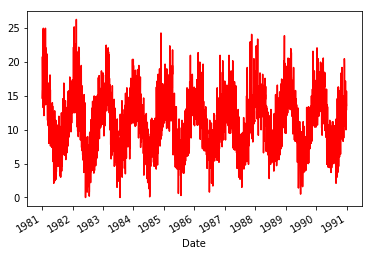

In [11]:
#plot the time series data
DustDataSeries.plot(color='red')

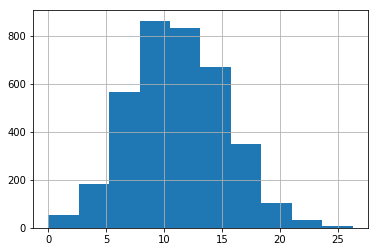

In [12]:
DustDataSeries.hist()

In [13]:
from statsmodels.tsa.arima_model import ARIMA

#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
	model = ARIMA(Actual, order=(P, D, Q))
	model_fit = model.fit(disp=0)
	prediction = model_fit.forecast()[0]
	return prediction

#creating data
temperatureData = [[1],[1.5],[2],[4],[6],[8],[16],[1]]

#predict next value
predicted = StartARIMAForecasting(temperatureData, 1,1,0)
#display the value
print('Predicted=%f' % (predicted))

Predicted=15.219306


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` ins

predicted=10.516887, expected=13.100000
predicted=10.635221, expected=10.400000
predicted=10.003677, expected=8.200000
predicted=8.852938, expected=9.800000
predicted=9.886231, expected=7.500000
predicted=6.792670, expected=5.800000
predicted=7.160823, expected=9.800000
predicted=9.650363, expected=7.900000
predicted=8.829359, expected=8.700000
predicted=9.529251, expected=10.000000
predicted=8.959702, expected=10.600000
predicted=8.875840, expected=8.000000
predicted=8.133483, expected=10.200000
predicted=10.900761, expected=15.100000
predicted=12.452629, expected=13.900000
predicted=11.762038, expected=9.200000
predicted=8.820777, expected=9.000000
predicted=9.050355, expected=13.200000
predicted=12.610260, expected=7.000000
predicted=8.471894, expected=10.600000
predicted=10.678898, expected=6.900000
predicted=7.818808, expected=9.500000
predicted=10.797404, expected=12.500000
predicted=10.292688, expected=13.600000
predicted=11.155045, expected=17.700000
predicted=13.807228, expect

predicted=12.981322, expected=12.000000
predicted=12.039048, expected=10.400000
predicted=11.376510, expected=10.000000
predicted=11.035620, expected=8.200000
predicted=10.449057, expected=9.400000
predicted=11.566879, expected=10.300000
predicted=11.360816, expected=8.100000
predicted=9.473408, expected=8.700000
predicted=9.685681, expected=12.600000
predicted=12.372528, expected=10.900000
predicted=10.183123, expected=8.700000
predicted=9.351720, expected=9.300000
predicted=9.533050, expected=6.300000
predicted=7.794228, expected=7.800000
predicted=9.191468, expected=10.000000
predicted=10.341530, expected=11.000000
predicted=10.945111, expected=11.100000
predicted=10.777127, expected=12.600000
predicted=11.764816, expected=10.200000
predicted=9.624654, expected=11.100000
predicted=10.557050, expected=8.700000
predicted=9.038789, expected=9.500000
predicted=9.909389, expected=9.700000
predicted=9.937993, expected=8.200000
predicted=9.081475, expected=5.000000
predicted=6.698856, expe

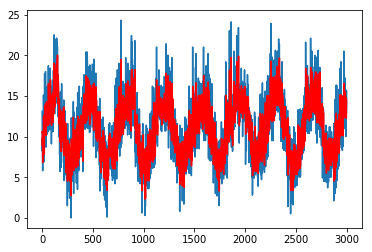

In [16]:
# create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('https://github.com/leehaesung/AWS_BIG_DATA_SPECIALTY/raw/master/data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset
X = series.values
train, test = X[1:len(X)-3000], X[len(X)-3000:]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
# END